In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor # RMSE 
from sklearn.metrics import mean_squared_error

In [34]:
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)

# Data Dictionary

## KP Column 설명
- RECV_DEPT_NM : 접수부서 코드 ☆
- RECV_CPLT_DM : 접수완료 일시
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

## NPA Column 설명
- RECV_CPLT_DT : 접수완료일자
- RECV_CPLT_TM : 접수완료시간
- NPA_CL : 경찰청 구분 ☆
- EVT_STAT_CD : 사건 상태 코드
- EVT_CL_CD : 사건종별코드
- RPTER_SEX : 신고 성별 (남 : 1 / 여 : 2 / 불상 : 3)
- HPPN_PNU_ADDR : 발생지점(PNU)
- HPPN_X : 발생좌표X
- HPPN_Y : 발생좌표Y
- SME_EVT_YN : 동일사건여부 

In [35]:
KP2020 = pd.read_csv("./KP2020.csv", encoding = 'cp949')
KP2020

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,충남청,20/12/01 01:43:07.000000000,19,10,305,1.0,충청남도 보령시 궁촌동(행정:대천4동) 369,126.598345,36.341537,Y
1,대전청,20/12/01 02:05:04.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
2,대전청,20/12/01 02:06:52.000000000,13,10,601,1.0,NaN,127.404663,36.341685,NaN
3,충남청,20/12/01 02:37:25.000000000,19,10,606,3.0,충청남도 보령시 천북면 하만리 628-10,126.524980,36.474390,N
4,충남청,20/12/01 08:17:50.000000000,19,10,401,2.0,충청남도 천안시 서북구 성정동(행정:성정2동) 1259,127.137160,36.826718,NaN
...,...,...,...,...,...,...,...,...,...,...
77072,충남청,20/12/31 01:18:16.000000000,19,10,302,2.0,충청남도 보령시 주교면 주교리(행정:주교면) 191-6,126.571002,36.387791,NaN
77073,충남청,20/12/31 01:17:45.000000000,19,10,501,3.0,NaN,NaN,NaN,NaN
77074,충남청,20/12/31 00:13:50.000000000,19,10,604,3.0,충청남도 아산시 온천동(행정:온양1동) 1498,127.000391,36.788411,NaN
77075,대전청,20/12/31 00:49:29.000000000,13,10,302,2.0,대전광역시 서구 갈마동(행정:갈마2동) 975,127.373351,36.348051,Y


In [36]:
KP2021 = pd.read_csv("./KP2021.csv", encoding = 'cp949')
KP2021

,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,대전청,21/03/07 00:00:01.000000000,13,10,604,3.0,대전광역시 서구 둔산동 1122,127.373676,36.350975,Y
1,대전청,21/03/07 00:02:13.000000000,13,10,201,1.0,대전광역시 유성구 상대동(원신흥동) 469-9,127.339018,36.347420,NaN
2,대전청,21/03/07 00:00:33.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
3,대전청,21/03/07 00:01:18.000000000,13,10,601,3.0,NaN,127.404663,36.341685,NaN
4,대전청,21/03/07 00:01:43.000000000,13,10,308,1.0,대전광역시 중구 선화동 141-16,127.420455,36.330413,NaN
...,...,...,...,...,...,...,...,...,...,...
2594055,대전청,23/01/12 11:23:09.000000000,13,10,104,1.0,대전광역시 유성구 봉명동 (행정:원신흥동 ) 1016-7,127.344600,36.352272,NaN
2594056,충남청,23/01/16 11:59:47.000000000,19,10,307,2.0,충청남도 서산시 음암면 부장리(음암면 ) 560-4,126.514047,36.785626,NaN
2594057,충남청,23/01/16 11:58:54.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN
2594058,충남청,23/01/14 01:00:47.000000000,19,10,601,3.0,NaN,NaN,NaN,NaN


In [37]:
NPA2020 = pd.read_csv("./NPA2020.csv", encoding = 'cp949')
NPA2020

,RECV_CPLT_DT,RECV_CPLT_TM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_OLD_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN
0,20200101,7,13,10,501,2,대전광역시 중구 목동(행정:목동) 360,127.409270,36.333010,Y
1,20200101,132,13,10,501,1,대전광역시 중구 대흥동(대흥동) 499-1,127.421295,36.325575,NaN
2,20200101,39,13,10,501,1,NaN,127.404663,36.341685,NaN
3,20200101,110,13,10,601,3,NaN,0.000000,0.000000,NaN
4,20200101,342,13,10,601,1,NaN,127.404663,36.341685,NaN
...,...,...,...,...,...,...,...,...,...,...
1178239,20201122,3505,19,10,501,1,,NaN,NaN,
1178240,20201122,5213,13,10,601,,,127.404663,36.341685,
1178241,20201122,4627,19,10,601,1,,NaN,NaN,Y
1178242,20201122,5246,19,5,301,1,충청남도 보령시 신흑동(행정:대천5동),126.516040,36.305619,


In [38]:
NPA2020['NPA_CL'].unique

<bound method Series.unique of 0          13
1          13
2          13
3          13
4          13
           ..
1178239    19
1178240    13
1178241    19
1178242    19
1178243    13
Name: NPA_CL, Length: 1178244, dtype: int64>

In [39]:
KP2020.isna().sum()

RECV_DEPT_NM         0
RECV_CPLT_DM         0
NPA_CL               0
EVT_STAT_CD          0
EVT_CL_CD            0
RPTER_SEX         2419
HPPN_PNU_ADDR    29272
HPPN_X           16764
HPPN_Y           16764
SME_EVT_YN       63635
dtype: int64

In [40]:
KP2021.isna().sum()

RECV_DEPT_NM           0
RECV_CPLT_DM           0
NPA_CL                 0
EVT_STAT_CD            0
EVT_CL_CD              0
RPTER_SEX          23894
HPPN_PNU_ADDR    1072094
HPPN_X            694401
HPPN_Y            694401
SME_EVT_YN       2079123
dtype: int64

In [41]:
NPA2020.isna().sum()

RECV_CPLT_DT          0
RECV_CPLT_TM          0
NPA_CL                0
EVT_STAT_CD           0
EVT_CL_CD             0
RPTER_SEX             0
HPPN_OLD_ADDR    258593
HPPN_X           101653
HPPN_Y           101653
SME_EVT_YN       596801
dtype: int64

- RECV_DEPT_NM : 버려도 될 듯
- RPTER_SEX : INT(FLOAT)로 통일
- HPPN_PNU_ADDR : 버려도 될 듯
- SEX : NAN값 -> 3으로 바꾸기

- HPPN_X, HPPN_Y : 위도 경도 결측치
- SME_EVT_YN : 결측치 N으로 바꾸기

- RECV_CPLT_DT, RECV_CPLT_TM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- RECV_CPLT_DM : 년도 / 월 / 일 / 시 / 분 / 초 단위로 나누기
- 신무진

- EVT_CL_CD : 종별 코드 → 보이스피싱 / 교통사고 분류 : 4인거만 찾아내기

In [42]:
x = NPA2020[NPA2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
NPA2020 = y

x = KP2021[KP2021['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2021 = y

x = KP2020[KP2020['EVT_CL_CD'] < 500]
y = x[x['EVT_CL_CD'] > 400]
KP2020 = y

KP2020.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2021.drop('RECV_DEPT_NM', axis = 1, inplace = True)
KP2020.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
KP2021.drop('HPPN_PNU_ADDR', axis = 1, inplace = True)
NPA2020.drop('HPPN_OLD_ADDR', axis = 1, inplace = True)
#드롭

NPA2020 = NPA2020.drop([42819, 250145, 551827, 609589, 659384, 767378, 802443, 838056, 1044961])

NPA2020["RPTER_SEX"] = NPA2020["RPTER_SEX"].fillna(3).astype(int)
KP2020["RPTER_SEX"] = KP2020["RPTER_SEX"].fillna(3).astype(int)
KP2021["RPTER_SEX"] = KP2021["RPTER_SEX"].fillna(3).astype(int)

#SEX : NAN값 -> 3으로 바꾸기

In [43]:
KP2020['RECV_CPLT_DM'] = KP2020['RECV_CPLT_DM'].astype(str)

def add_20(a):
    return '20'+ a

KP2020['TIME'] = KP2020['RECV_CPLT_DM'].apply(add_20)

# 년
KP2020['YEAR'] =  pd.to_datetime(KP2020['TIME']).dt.year

# 월
KP2020['MONTH'] =  pd.to_datetime(KP2020['TIME']).dt.month

# 일
KP2020['DAY'] =  pd.to_datetime(KP2020['TIME']).dt.day

# 시
KP2020['HOUR'] =  pd.to_datetime(KP2020['TIME']).dt.hour

# 분
KP2020['MINUTE'] =  pd.to_datetime(KP2020['TIME']).dt.minute

# 초
KP2020['SECOND'] =  pd.to_datetime(KP2020['TIME']).dt.second

# 요일
KP2020['WEEKDAY'] = pd.to_datetime(KP2020['TIME']).dt.weekday

# 원래 시간 컬럼 삭제
KP2020 = KP2020.drop(['RECV_CPLT_DM','TIME'], axis = 1)

KP2021['RECV_CPLT_DM'] = KP2021['RECV_CPLT_DM'].astype(str)

KP2021['TIME'] = KP2021['RECV_CPLT_DM'].apply(add_20)

# 년
KP2021['YEAR'] =  pd.to_datetime(KP2021['TIME']).dt.year

# 월
KP2021['MONTH'] =  pd.to_datetime(KP2021['TIME']).dt.month

# 일
KP2021['DAY'] =  pd.to_datetime(KP2021['TIME']).dt.day

# 시
KP2021['HOUR'] =  pd.to_datetime(KP2021['TIME']).dt.hour

# 분
KP2021['MINUTE'] =  pd.to_datetime(KP2021['TIME']).dt.minute

# 초
KP2021['SECOND'] =  pd.to_datetime(KP2021['TIME']).dt.second

# 요일
KP2021['WEEKDAY'] = pd.to_datetime(KP2021['TIME']).dt.weekday

# 원래 시간 컬럼 삭제
KP2021= KP2021.drop(['RECV_CPLT_DM','TIME'], axis = 1)


NPA2020['RECV_CPLT_DT'] = NPA2020['RECV_CPLT_DT'].astype(str)
NPA2020['RECV_CPLT_DT'].info()

def silce_year(a):
    return a[:4]
def silce_month(a):
    return a[4:6]
def silce_day(a):
    return a[6:]

# 년
NPA2020['YEAR'] = NPA2020['RECV_CPLT_DT'].apply(silce_year)
NPA2020['YEAR']
# 월
NPA2020['MONTH'] = NPA2020['RECV_CPLT_DT'].apply(silce_month)
NPA2020['MONTH']
# 일
NPA2020['DAY'] = NPA2020['RECV_CPLT_DT'].apply(silce_day)
NPA2020['DAY']

NPA2020['RECV_CPLT_TM'] = NPA2020['RECV_CPLT_TM'].astype(str)
NPA2020['RECV_CPLT_TM'].info()

def add_00(a):
    if len(a) == 6:
        return a
    elif len(a) == 5:
        return '0' + a
    elif len(a) == 4:
        return '0' * 2 + a
    elif len(a) == 3:
        return '0' * 3 + a
    elif len(a) == 2:
        return '0' * 4 + a
    else:
        return '0' * 5 + a

NPA2020['TIME'] = NPA2020['RECV_CPLT_TM'].apply(add_00)
NPA2020['TIME']

def silce_hour(a):
    return a[:2]

def silce_min(a):
    return a[2:4]

def silce_sec(a):
    return a[4:]

# 시
NPA2020['HOUR'] = NPA2020['TIME'].apply(silce_hour)
NPA2020['HOUR']

# 분
NPA2020['MINUTE'] = NPA2020['TIME'].apply(silce_min)
NPA2020['MINUTE']

# 초
NPA2020['SECOND'] = NPA2020['TIME'].apply(silce_sec)
NPA2020['SECOND']

# 원래 시간 컬럼 삭제
NPA2020 = NPA2020.drop(['TIME', 'RECV_CPLT_TM', 'RECV_CPLT_DT'], axis = 1)

<class 'pandas.core.series.Series'>
Int64Index: 142919 entries, 38 to 1178234
Series name: RECV_CPLT_DT
Non-Null Count   Dtype 
--------------   ----- 
142919 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB
<class 'pandas.core.series.Series'>
Int64Index: 142919 entries, 38 to 1178234
Series name: RECV_CPLT_TM
Non-Null Count   Dtype 
--------------   ----- 
142919 non-null  object
dtypes: object(1)
memory usage: 2.2+ MB


In [44]:
# 위도, 경도 결측치 행 제거
KP2020 = KP2020.dropna(subset = ['HPPN_X','HPPN_Y'])
KP2021 = KP2021.dropna(subset = ['HPPN_X','HPPN_Y'])
NPA2020 = NPA2020.dropna(subset = ['HPPN_X','HPPN_Y'])

# 결측치 N으로 바꾸기
KP2020['SME_EVT_YN'] = KP2020['SME_EVT_YN'].fillna('N')
KP2021['SME_EVT_YN'] = KP2021['SME_EVT_YN'].fillna('N')
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].fillna('N')


In [45]:
NPA2020

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
38,13,10,402,1,127.386346,36.346856,N,2020,01,01,00,32,40
41,13,10,406,1,127.349989,36.360797,N,2020,01,01,00,35,32
54,13,10,401,1,127.348625,36.353829,N,2020,01,01,00,21,35
66,13,10,401,1,127.405055,36.328573,N,2020,01,01,00,43,01
117,13,10,401,3,127.445780,36.345500,N,2020,01,01,18,43,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178083,13,7,406,1,127.404540,36.325219,,2020,11,22,00,20,07
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,40,08
1178143,19,5,406,3,127.107617,36.813773,,2020,11,22,00,57,19
1178173,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,37,53


In [70]:
# NPA2020 요일 변경
NPA2020['TIME'] = NPA2020['YEAR'] + NPA2020['MONTH'] + NPA2020['DAY']
NPA2020['WEEKDAY'] = pd.to_datetime(NPA2020['TIME']).dt.weekday
NPA2020['WEEKDAY']
NPA2020 = NPA2020.drop(['TIME'], axis = 1)

In [71]:
def N_rep(x):
    if x == ' ':
        return 'N'
    else:
        return x

In [72]:
NPA2020['SME_EVT_YN'] = NPA2020['SME_EVT_YN'].apply(N_rep)
NPA2020['SME_EVT_YN']

38         N
41         N
54         N
66         N
117        N
          ..
1178083    N
1178086    Y
1178143    N
1178173    Y
1178234    N
Name: SME_EVT_YN, Length: 140958, dtype: object

In [73]:
NPA2020['SME_EVT_YN'].value_counts()

N    121179
Y     19779
Name: SME_EVT_YN, dtype: int64

In [74]:
KP2021

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,WEEKDAY
14,19,10,406,1,127.107500,36.811944,N,2021,3,7,0,2,48,6
20,19,10,402,1,127.150988,36.811792,Y,2021,3,7,0,9,4,6
23,13,10,401,2,127.371854,36.341961,N,2021,3,7,0,7,54,6
26,13,10,401,1,127.339334,36.346899,N,2021,3,7,0,15,27,6
44,19,10,403,2,127.090733,36.453397,N,2021,3,7,0,12,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2593994,13,10,401,1,127.384284,36.334507,N,2023,1,15,20,1,39,6
2594002,19,10,401,1,126.262393,36.751467,N,2023,1,16,21,26,56,0
2594006,19,10,403,2,127.147678,36.789125,N,2023,1,14,1,2,48,5
2594019,13,10,401,1,127.433785,36.450725,N,2023,1,14,17,35,38,5


In [75]:
KP2020

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,WEEKDAY
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50,1
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26,1
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18,1
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44,1
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77024,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,16,14,3
77036,13,10,401,1,127.428343,36.324386,N,2020,12,31,1,8,43,3
77066,19,10,406,1,126.298968,36.747649,Y,2020,12,31,0,26,16,3
77068,13,10,401,1,127.369099,36.312971,N,2020,12,31,1,17,1,3


In [76]:
c = pd.concat([KP2020, KP2021])
data = pd.concat([c, NPA2020])
data

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,WEEKDAY
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50,1
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26,1
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18,1
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44,1
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178083,13,7,406,1,127.404540,36.325219,N,2020,11,22,00,20,07,6
1178086,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,40,08,6
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,00,57,19,6
1178173,13,5,401,1,127.446090,36.320140,Y,2020,11,22,00,37,53,6


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426761 entries, 4 to 1178234
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NPA_CL       426761 non-null  int64  
 1   EVT_STAT_CD  426761 non-null  int64  
 2   EVT_CL_CD    426761 non-null  int64  
 3   RPTER_SEX    426761 non-null  int32  
 4   HPPN_X       426761 non-null  float64
 5   HPPN_Y       426761 non-null  float64
 6   SME_EVT_YN   426761 non-null  object 
 7   YEAR         426761 non-null  object 
 8   MONTH        426761 non-null  object 
 9   DAY          426761 non-null  object 
 10  HOUR         426761 non-null  object 
 11  MINUTE       426761 non-null  object 
 12  SECOND       426761 non-null  object 
 13  WEEKDAY      426761 non-null  int64  
dtypes: float64(2), int32(1), int64(4), object(7)
memory usage: 47.2+ MB


In [78]:
# str > int 변환
data['YEAR'] = data['YEAR'].astype(int)
data['MONTH'] = data['MONTH'].astype(int)
data['DAY'] = data['DAY'].astype(int)
data['HOUR'] = data['HOUR'].astype(int)
data['MINUTE'] = data['MINUTE'].astype(int)
data['SECOND'] = data['SECOND'].astype(int)

In [79]:
data['NPA_CL'].value_counts()

19    248118
13    156473
31     16662
18      2353
15      1978
20       679
21       143
8        116
11        73
16        35
22        34
10        19
17        18
23        18
9         14
12        12
24         9
14         7
Name: NPA_CL, dtype: int64

* 경찰청 구분 (충남, 대전, 세종)
    * 19 : 충남청
    * 13 : 대전청
    * 31 : 세종청

In [80]:
data = data[(data['NPA_CL'] == 19) | (data['NPA_CL'] == 13) | (data['NPA_CL'] == 31)]

In [81]:
data['NPA_CL'].value_counts()

19    248118
13    156473
31     16662
Name: NPA_CL, dtype: int64

In [82]:
data['EVT_STAT_CD'].value_counts()

10    420091
5        790
7        353
3          8
6          6
2          4
9          1
Name: EVT_STAT_CD, dtype: int64

* 사건상태코드 : 7 / 10 > 종결요청 병합
* 사건상태코드 : 5 > 도착

In [83]:
data['EVT_STAT_CD'] = data['EVT_STAT_CD'].replace(7, 10)

In [84]:
data['EVT_STAT_CD'].value_counts()

10    420444
5        790
3          8
6          6
2          4
9          1
Name: EVT_STAT_CD, dtype: int64

In [85]:
data['EVT_CL_CD'].value_counts()

401    259892
406     67468
402     59317
403     34507
405        48
404        21
Name: EVT_CL_CD, dtype: int64

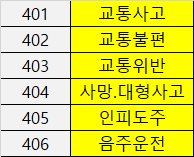

* **사건 종별**
    * 401 : 교통사고
    * 406 : 음주운전
    * 402 : 교통불편
    * 403 : 교통위반

* 교통사고 > 도로 파악 / 음주운전 여부 확인

In [86]:
data.head()

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,WEEKDAY
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50,1
7,13,10,406,1,127.341551,36.353696,N,2020,12,1,3,24,26,1
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18,1
9,13,10,401,1,127.447545,36.306724,N,2020,12,1,7,8,44,1
10,13,10,401,2,127.447175,36.306694,N,2020,12,1,7,9,20,1


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421253 entries, 4 to 1178234
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   NPA_CL       421253 non-null  int64  
 1   EVT_STAT_CD  421253 non-null  int64  
 2   EVT_CL_CD    421253 non-null  int64  
 3   RPTER_SEX    421253 non-null  int32  
 4   HPPN_X       421253 non-null  float64
 5   HPPN_Y       421253 non-null  float64
 6   SME_EVT_YN   421253 non-null  object 
 7   YEAR         421253 non-null  int32  
 8   MONTH        421253 non-null  int32  
 9   DAY          421253 non-null  int32  
 10  HOUR         421253 non-null  int32  
 11  MINUTE       421253 non-null  int32  
 12  SECOND       421253 non-null  int32  
 13  WEEKDAY      421253 non-null  int64  
dtypes: float64(2), int32(7), int64(4), object(1)
memory usage: 37.0+ MB


(-1.1107904385397456,
 1.1005138365026728,
 -1.1197488109781273,
 1.1129755493400386)

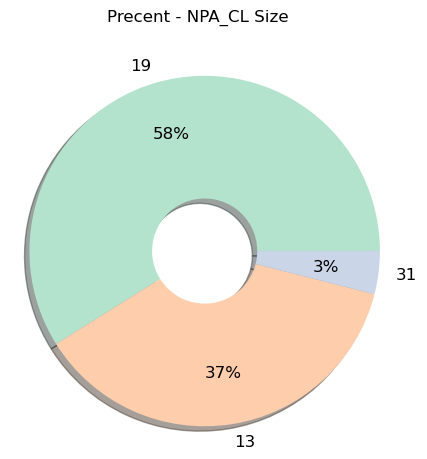

In [118]:
def custom_autopct(pct):
  return ('%d%%' % pct) if pct > 2 else '' # 2프로 이상인 컬럼만 표시

# 전체 - 경찰청별 사고 총 건수(비율)
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(5, 5)
fig.suptitle("Precent - NPA_CL Size")

ax1.pie(data['NPA_CL'].value_counts().values,
        labels=data['NPA_CL'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel2',len(data['NPA_CL'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

(-1.110876787205718, 1.10051794224909, -1.1154188381491688, 1.1134269488183528)

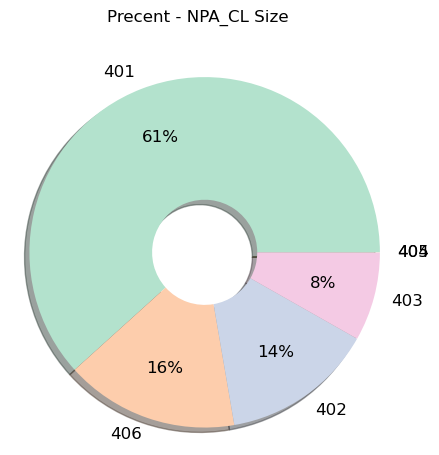

In [119]:
# 전체 - 사고 유형 총 건수(비율)
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(5, 5)
fig.suptitle("Precent - NPA_CL Size")

ax1.pie(data['EVT_CL_CD'].value_counts().values,
        labels=data['EVT_CL_CD'].value_counts().index,
        autopct=custom_autopct,
        colors=sns.color_palette('Pastel2',len(data['EVT_CL_CD'].value_counts().index)),
        shadow = True, pctdistance=0.7, 
        wedgeprops = {'width': 0.7},
        textprops={'fontsize':12})
ax1.axis('equal')

<AxesSubplot:xlabel='EVT_CL_CD', ylabel='count'>

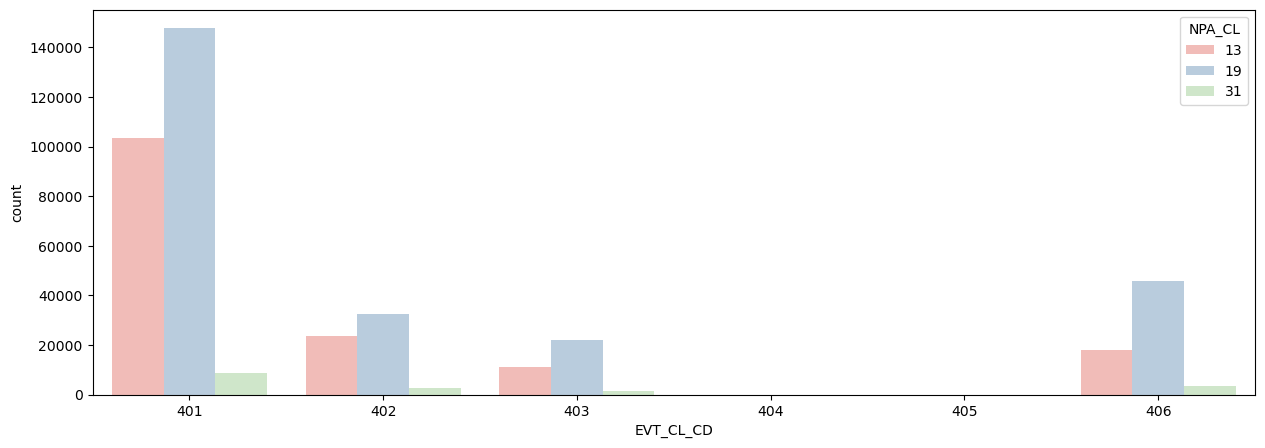

In [104]:
 # 경찰청별 사고 건수
plt.figure(figsize = (15,5))
sns.countplot(x='EVT_CL_CD',hue='NPA_CL',data = data, palette = 'Pastel1')

<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

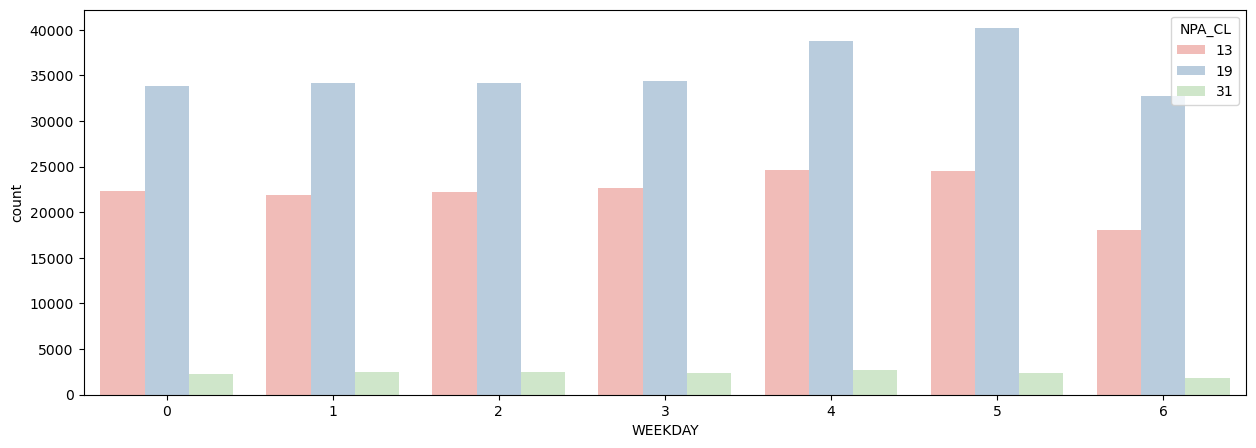

In [106]:
 # 요일별 사고 건수
plt.figure(figsize = (15,5))
sns.countplot(x='WEEKDAY',hue='NPA_CL',data = data, palette = 'Pastel1')

 * 4 : 금요일 / 5: 토요일
     * **19(충남청)**의 신고 건수의 비율이 평일에 비해 높은 것을 볼 수 있다.
     

<AxesSubplot:xlabel='EVT_CL_CD', ylabel='count'>

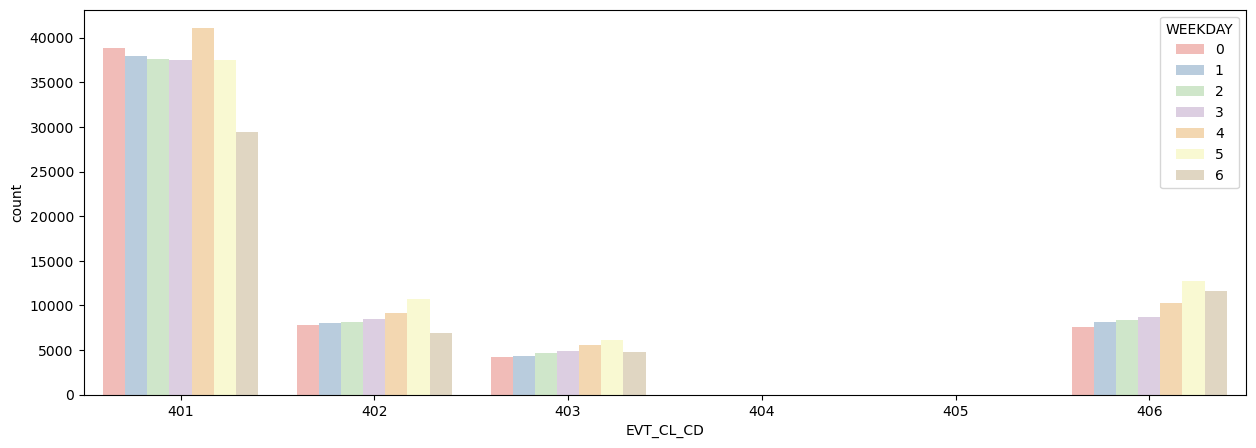

In [107]:
 # 전체 요일별 사고 유형
plt.figure(figsize = (15,5))
sns.countplot(x='EVT_CL_CD',hue='WEEKDAY',data = data, palette = 'Pastel1')

* 금요일 : 교통사고 / 토요일 : 교통불편, 음주운전

* **경찰청 구분** (충남, 대전, 세종)
    * 19 : 충남청
    * 13 : 대전청
    * 31 : 세종청

* **사건 종별**
    * 401 : 교통사고
    * 406 : 음주운전
    * 402 : 교통불편
    * 403 : 교통위반

In [109]:
# 충남청 데이터 코드
data_npa_cl_19 = data[data['NPA_CL'] == 19]
data_npa_cl_19

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,WEEKDAY
4,19,10,401,2,127.137160,36.826718,N,2020,12,1,8,17,50,1
8,19,10,402,1,127.136142,36.917900,N,2020,12,1,7,37,18,1
11,19,10,402,1,126.807222,36.395000,N,2020,12,1,8,21,8,1
28,19,10,406,1,127.055248,36.773785,Y,2020,12,1,1,8,51,1
31,19,10,401,1,126.412290,36.967612,N,2020,12,1,1,36,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178016,19,10,406,1,127.159432,36.800444,N,2020,11,22,0,2,49,6
1178057,19,5,406,1,127.125278,36.919444,N,2020,11,22,0,10,47,6
1178067,19,5,406,1,127.005016,36.784637,N,2020,11,22,0,53,35,6
1178143,19,5,406,3,127.107617,36.813773,N,2020,11,22,0,57,19,6


<AxesSubplot:xlabel='WEEKDAY', ylabel='count'>

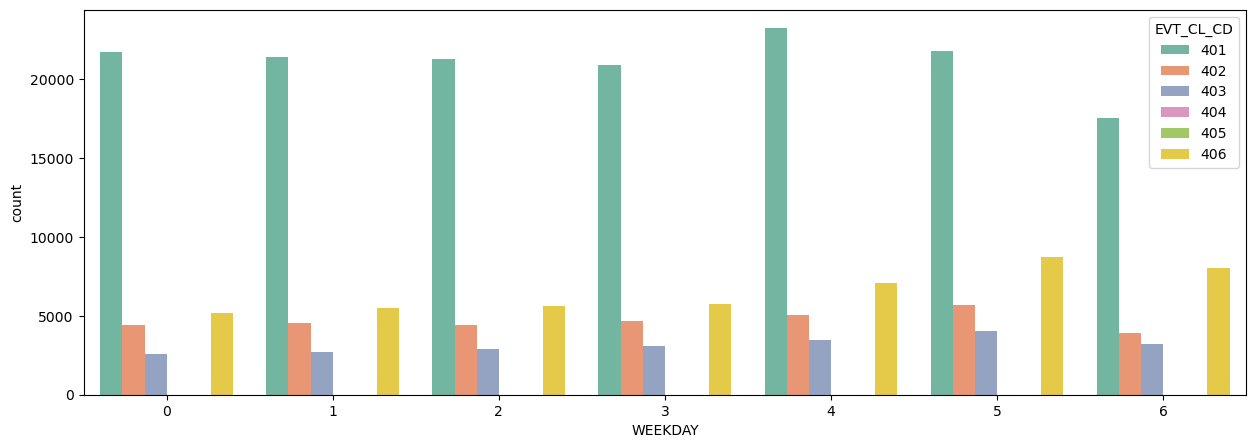

In [121]:
 # 요일별 사고 건수
plt.figure(figsize = (15,5))
sns.countplot(x='WEEKDAY',hue='EVT_CL_CD',data = data_npa_cl_19, palette = 'Set2')

* 19(충남청)의 신고 건수
    * 금요일(4)에 교통사고(401) 건수가 가장 높으며
    * 토요일(5)과 일요일(6)의 음주운전(406) 건수가 높아 지는 것을 볼 수 있다.
    > 이후 공휴일(설날) 등의 날짜를 공휴일로 바꿔서 비교 해보는 식의 분석도 필요

<AxesSubplot:xlabel='HOUR', ylabel='count'>

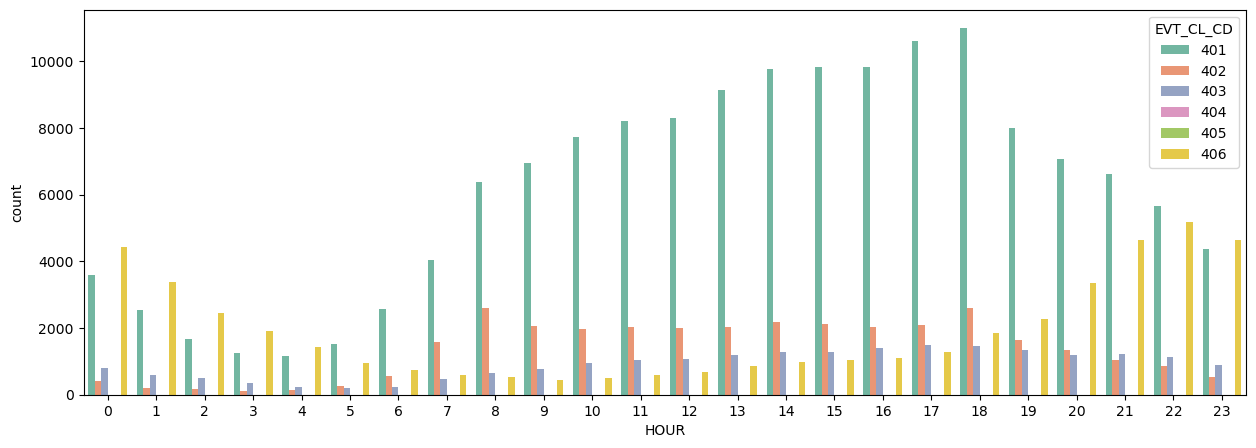

In [113]:
# 시간대별 사고 유형
plt.figure(figsize = (15,5))
sns.countplot(x='HOUR',hue='EVT_CL_CD',data = data_npa_cl_19, palette = 'Set2')

* 시간대 별에서는 음주운전의 경우 19 ~ 02시의 비율이 좋은 것을 볼 수 있다.
* 교통사고의 비율은 06 ~ 18시까지 증가하며 그이후는 감소 하는 것을 볼 수 있다.
* 교통불편의 경우 08시와 18시가 높은 것을 확인 할 수 있는데, 이를 볼 때 출 퇴근 시간 교통불편의 신고가 많다고 추측 할 수 있다.

## 지도 그리기

In [49]:
!pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [104]:
import folium

In [119]:
m = folium.Map(location=[36.661297, 126.676296], # 충남 경찰청 
               zoom_start=12, 
               )
folium.Marker([36.661297, 126.676296],     
    tooltip='충남 경찰청',
    icon=folium.Icon(
        color='purple',
        icon_color='white',
        # icon='glyphicon glyphicon-thumbs-up', # googledp glyphicon 검색해서 관련된 코드 제공해주는 사이트들 참고해서 원하는 것 가져오기
        prefix='glyphicon',
            
    )
).add_to(m)
m


In [120]:
data_19_406 = data[(data['NPA_CL'] == 19) & (data['EVT_CL_CD'] == 406) & (data['SME_EVT_YN'] == 'Y')]
data_19_406

,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_X,HPPN_Y,SME_EVT_YN,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND
28,19,10,406,1,127.055248,36.773785,Y,2020,12,1,1,8,51
161,19,10,406,1,127.060483,36.778638,Y,2020,12,1,1,7,1
168,19,10,406,1,127.057063,36.774519,Y,2020,12,1,0,2,7
170,19,10,406,1,127.057063,36.774519,Y,2020,12,1,0,6,31
543,19,10,406,1,127.011613,36.824380,Y,2020,12,1,10,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175807,19,10,406,1,127.253271,36.771418,Y,2020,11,21,1,7,51
1175810,19,10,406,1,127.253271,36.771418,Y,2020,11,21,1,20,6
1176568,19,10,406,1,127.141280,36.917150,Y,2020,11,20,4,26,1
1176575,19,10,406,3,127.108506,36.817748,Y,2020,11,20,5,57,51


In [121]:
data_19_406.reset_index(inplace = True)
for i in range(1,1000):
    marker01 = folium.Marker([data_19_406.loc[i]['HPPN_Y'], data_19_406.loc[i]['HPPN_X']],
                icon = folium.Icon(color = 'blue'))
    marker01.add_to(m)
m